# part one

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# the path of CSV files
file_paths = [
    "C:\\Users\\Chilima\\OneDrive - FSV\\Plocha\\Python\\49833831\\data\\BMY.csv",
    "C:\\Users\\Chilima\\OneDrive - FSV\\Plocha\\Python\\49833831\\data\\DFS.csv",
    "C:\\Users\\Chilima\\OneDrive - FSV\\Plocha\\Python\\49833831\\data\\EXR.csv",
    "C:\\Users\\Chilima\\OneDrive - FSV\\Plocha\\Python\\49833831\\data\\LIN.csv",
    "C:\\Users\\Chilima\\OneDrive - FSV\\Plocha\\Python\\49833831\\data\\VNO.csv"
]

# Creating a DataFrame 
dataframes = {}
for file_path in file_paths:
    ticker = file_path.split('\\')[-1].replace('.csv', '')
    df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
    dataframes[ticker] = df

In [39]:
# 1: 
for ticker, df in dataframes.items():
    if (df['Close'] == df['Adj Close']).all():
        print(f"{ticker} has no difference between Close and Adj Close")


In [40]:
# 2:
for ticker, df in dataframes.items():
    print(f"{ticker}: Highest - {df['Adj Close'].max()}, Lowest - {df['Adj Close'].min()}")

BMY: Highest - 79.9800033569336, Lowest - 38.68001937866211
DFS: Highest - 133.75759887695312, Lowest - 24.114564895629883
EXR: Highest - 226.72999572753903, Lowest - 67.9879379272461
LIN: Highest - 346.42999267578125, Lowest - 133.05062866210938
VNO: Highest - 63.30339813232422, Lowest - 21.09000015258789


In [41]:
# 3:
for ticker, df in dataframes.items():
    df['Log Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    print(f"{ticker}: Min - {df['Log Return'].min()}, Max - {df['Log Return'].max()}, Mean - {df['Log Return'].mean()}, Median - {df['Log Return'].median()}")


BMY: Min - -0.14230263856431472, Max - 0.06618034829129522, Mean - 0.00029570598976889987, Median - 0.0006085829566971591
DFS: Min - -0.3124583638354541, Max - 0.23707993349851184, Mean - 0.0004875407617815387, Median - 0.0009174650684845278
EXR: Min - -0.16805242233818724, Max - 0.07859636687376174, Mean - 0.0005889779831886137, Median - 0.0009286983995485392
LIN: Min - -0.10851297310230681, Max - 0.11059924614182688, Mean - 0.0006978635389229713, Median - 0.0010888361994789409
VNO: Min - -0.2784550577445853, Max - 0.24212576799200522, Mean - -0.0006785618388521377, Median - 0.0


In [42]:
# 4:
for ticker, df in dataframes.items():
    print(f"{ticker}: Highest gain - {df['Log Return'].idxmax()}, Highest loss - {df['Log Return'].idxmin()}")


BMY: Highest gain - 2020-11-04 00:00:00, Highest loss - 2019-01-03 00:00:00
DFS: Highest gain - 2020-03-24 00:00:00, Highest loss - 2020-03-16 00:00:00
EXR: Highest gain - 2020-03-26 00:00:00, Highest loss - 2020-03-16 00:00:00
LIN: Highest gain - 2020-03-13 00:00:00, Highest loss - 2020-03-16 00:00:00
VNO: Highest gain - 2020-11-09 00:00:00, Highest loss - 2020-03-16 00:00:00


In [43]:
# 5:
for ticker, df in dataframes.items():
    weekly_volume = df['Volume'].resample('W').mean()
    print(f"{ticker}: Average weekly volume - {weekly_volume.mean()}")


BMY: Average weekly volume - 11938972.375478927
DFS: Average weekly volume - 2347542.835249042
EXR: Average weekly volume - 884225.459770115
LIN: Average weekly volume - 1976207.2796934866
VNO: Average weekly volume - 1580354.2911877395


In [44]:
# 6:
total_returns = {}
for ticker, df in dataframes.items():
    total_returns[ticker] = df['Log Return'].sum()
best_company = max(total_returns, key=total_returns.get)
print(f"Company with the highest total return: {best_company}")


Company with the highest total return: LIN


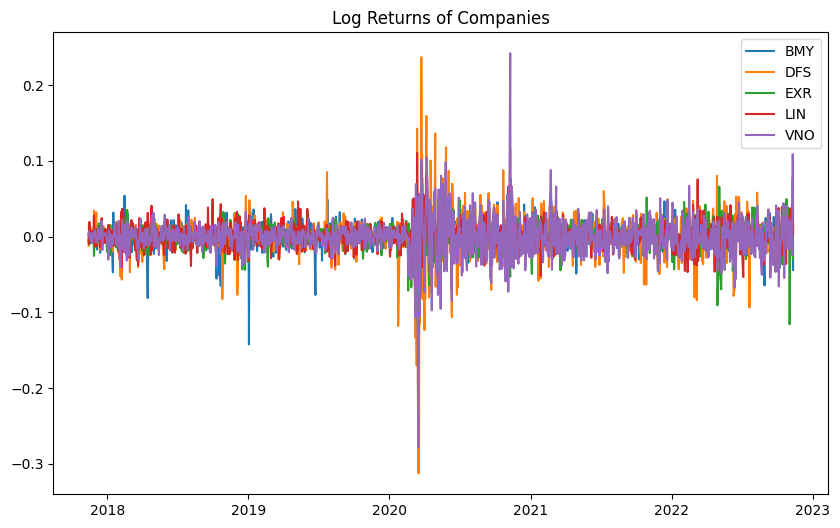

In [45]:
# 7:
plt.figure(figsize=(10, 6))
for ticker, df in dataframes.items():
    plt.plot(df['Log Return'], label=ticker)
plt.legend()
plt.title("Log Returns of Companies")
plt.show()


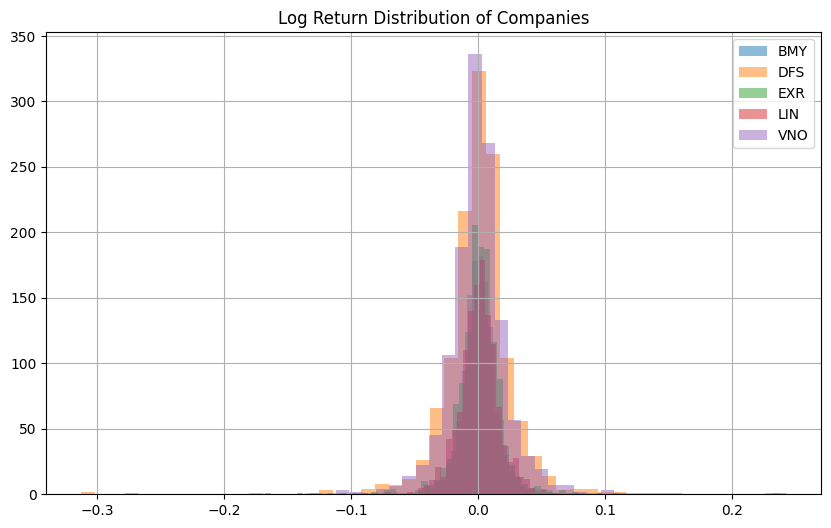

In [46]:
# 8:
plt.figure(figsize=(10, 6))
for ticker, df in dataframes.items():
    df['Log Return'].hist(bins=50, alpha=0.5, label=ticker)
plt.legend()
plt.title("Log Return Distribution of Companies")
plt.show()


# part two

In [47]:
import pandas as pd

# Load the dataset
url_no_subindustry = 'https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv'
companies_no_subindustry = pd.read_csv(url_no_subindustry)

# 1:
missing_inclusion_dates = companies_no_subindustry['included'].isnull().sum()
print(f"Task 1: Number of companies without a filled-in date of inclusion: {missing_inclusion_dates}")


Task 1: Number of companies without a filled-in date of inclusion: 45


In [48]:
print(companies_no_subindustry.head())


  Symbol     Security  GICS_Sector                       hq    included  \
0    MMM           3M  Industrials    Saint Paul, Minnesota  09.08.1976   
1    AOS  A. O. Smith  Industrials     Milwaukee, Wisconsin  26.07.2017   
2    ABT       Abbott  Health Care  North Chicago, Illinois  31.03.1964   
3   ABBV       AbbVie  Health Care  North Chicago, Illinois  31.12.2012   
4   ABMD      Abiomed  Health Care   Danvers, Massachusetts  31.05.2018   

       Founded  
0         1902  
1         1916  
2         1888  
3  2013 (1888)  
4         1981  


In [49]:
# column to datetime
companies_with_inclusion.loc[:, 'included'] = pd.to_datetime(companies_with_inclusion['included'], format='%d.%m.%Y')

# Calculations
current_date = pd.Timestamp('today')
companies_with_inclusion.loc[:, 'age'] = (current_date - companies_with_inclusion['included']).dt.days / 365.25

oldest_constituent = companies_with_inclusion.loc[companies_with_inclusion['age'].idxmax()]
youngest_constituent = companies_with_inclusion.loc[companies_with_inclusion['age'].idxmin()]
average_age = companies_with_inclusion['age'].mean()

print(f"Oldest constituent: {oldest_constituent['Symbol']} - {oldest_constituent['Security']}")
print(f"Youngest constituent: {youngest_constituent['Symbol']} - {youngest_constituent['Security']}")
print(f"Average age of constituents: {average_age:.2f} years.")


Oldest constituent: MO - Altria
Youngest constituent: ACGL - Arch Capital Group
Average age of constituents: 22.83 years.



Task 3: Sector distribution
GICS_Sector
Information Technology    68
Industrials               66
Health Care               60
Financials                55
Consumer Discretionary    52
Consumer Staples          33
Real Estate               30
Materials                 26
Communication Services    23
Utilities                 23
Energy                    22
Name: count, dtype: int64


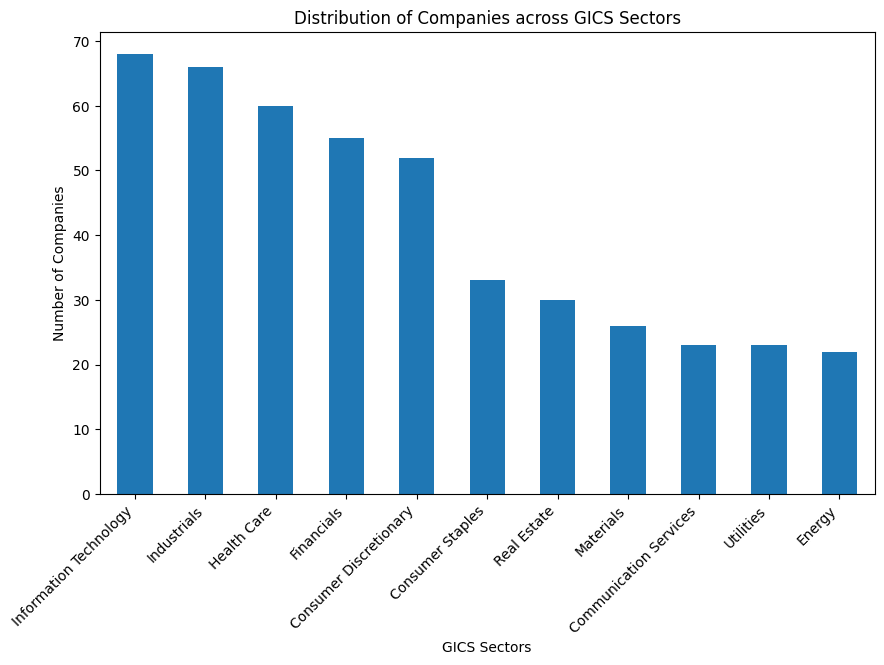

In [50]:
# 3:
sector_counts = companies_with_inclusion['GICS_Sector'].value_counts()

print("\nTask 3: Sector distribution")
print(sector_counts)

sector_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Companies across GICS Sectors')
plt.xlabel('GICS Sectors')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right') 
plt.show()



In [51]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

companies_with_inclusion['state'] = companies_with_inclusion['hq'].str.split(', ').str[-1].apply(lambda x: x if x in states else None)
state_distribution = companies_with_inclusion['state'].value_counts()

print("State distribution")
print(state_distribution)


State distribution
Series([], Name: count, dtype: int64)


In [52]:
url_subindustry = 'https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv'
companies_subindustry = pd.read_csv(url_subindustry)

if 'Symbol' in companies_subindustry.columns and 'Symbol' in companies_with_inclusion.columns:
   
    joined_data = pd.merge(companies_with_inclusion, companies_subindustry, on='Symbol', how='inner')
    
    consumer_discretionary_subindustries = joined_data[joined_data['GICS_Sector'] == 'Consumer Discretionary']['subindustry'].value_counts()
    
    print("Distribution of subindustries in the 'Consumer Discretionary' sector")
    print(consumer_discretionary_subindustries)
else:
    print("Error: The 'Symbol' column is not present in both datasets.")


Distribution of subindustries in the 'Consumer Discretionary' sector
subindustry
Specialty Stores                       6
Restaurants                            5
Internet & Direct Marketing Retail     5
Casinos & Gaming                       4
Hotels, Resorts & Cruise Lines         4
Homebuilding                           4
General Merchandise Stores             3
Apparel, Accessories & Luxury Goods    3
Automobile Manufacturers               3
Home Improvement Retail                2
Distributors                           2
Automotive Retail                      2
Auto Parts & Equipment                 2
Apparel Retail                         2
Leisure Products                       1
Consumer Electronics                   1
Computer & Electronics Retail          1
Home Furnishings                       1
Housewares & Specialties               1
Name: count, dtype: int64
